# ***Advanced House Price Prediction***

*The aim of this project is to predict the house price based on various features.*

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
## display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [59]:
data = pd.read_csv('train.csv')
print(data.shape)

(1460, 81)


In [60]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### ***Missing Values***

In [61]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in data.columns if data[features].isnull().sum()>1]

## ## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(data[feature].isnull().mean(),4), '% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


### ***Since they are many missing values, we need to find the relationship between missing values and Sales Price***

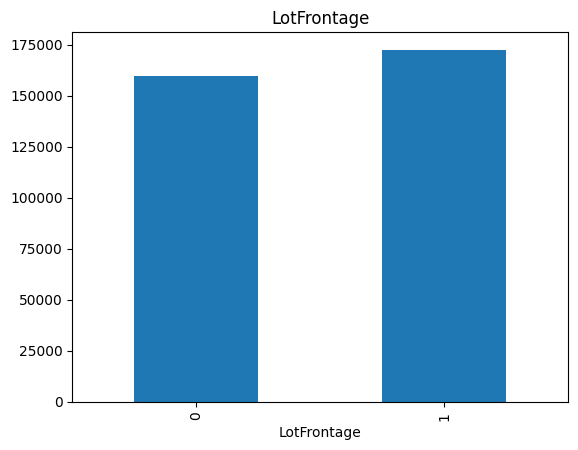

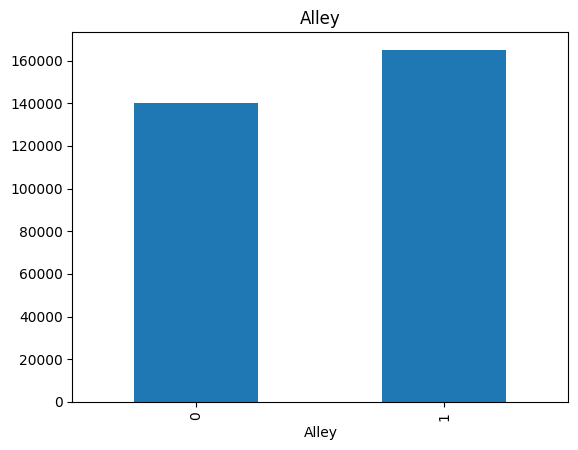

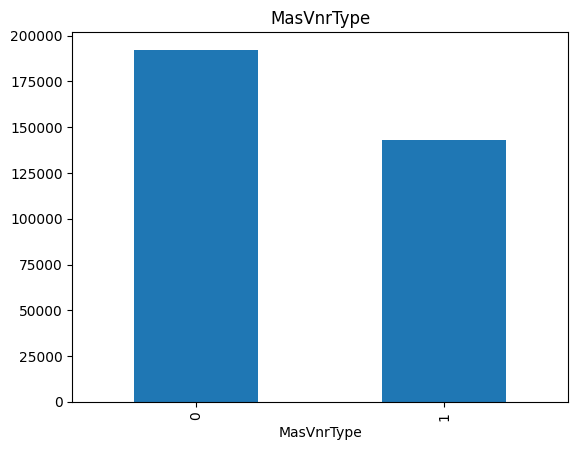

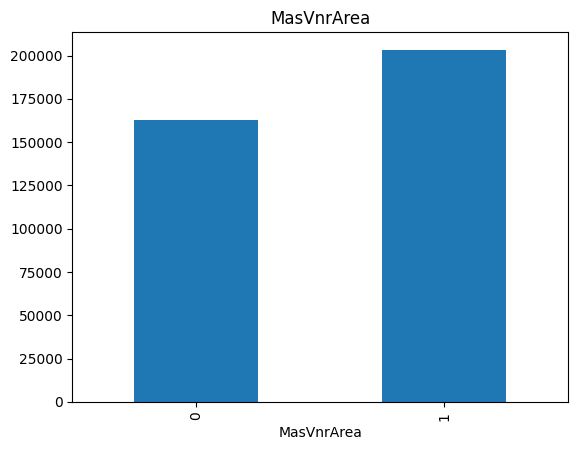

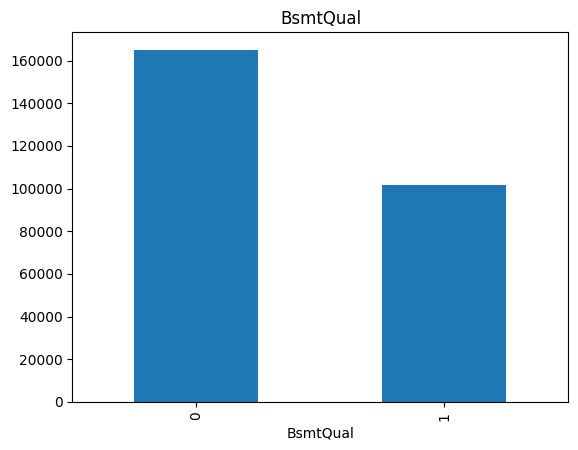

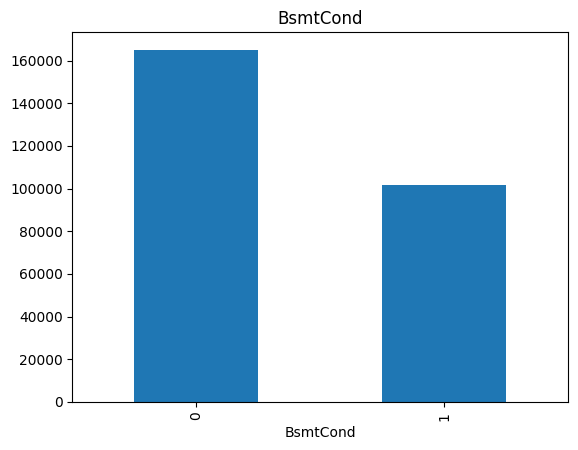

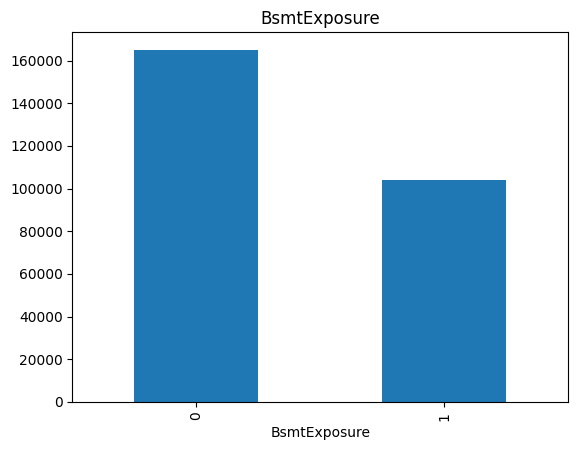

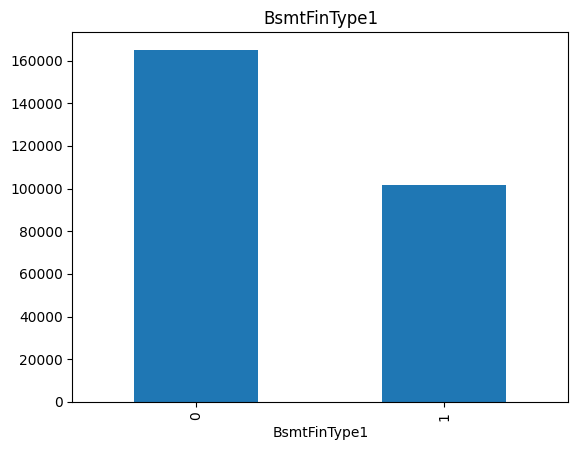

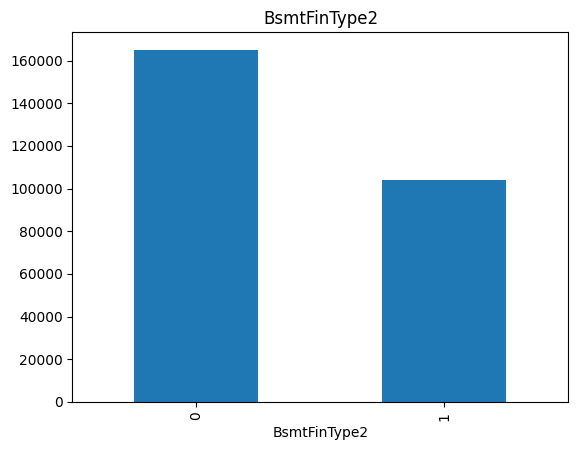

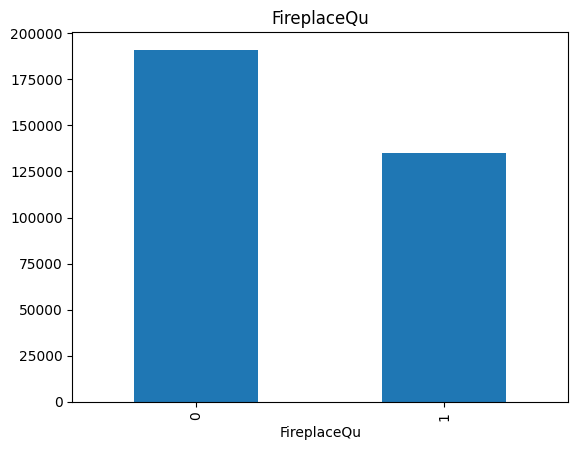

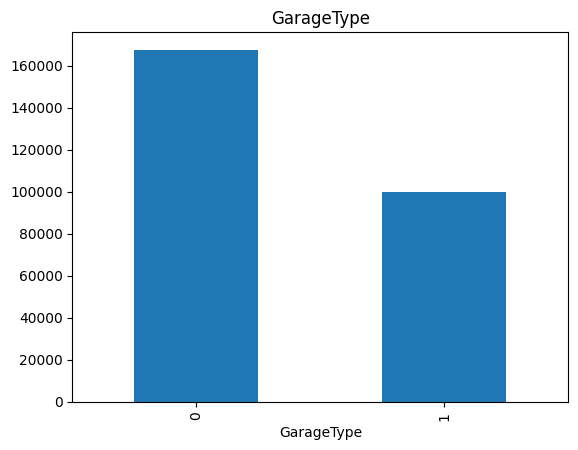

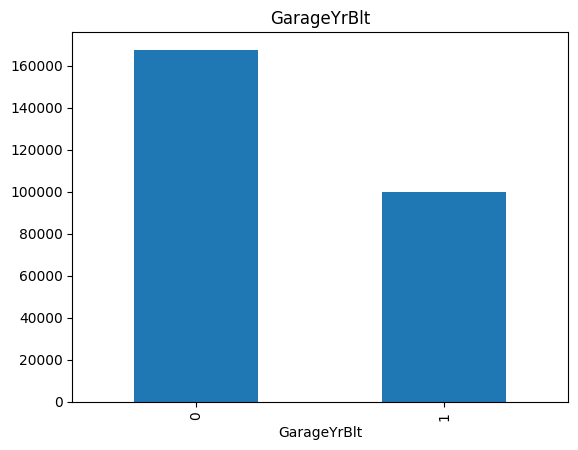

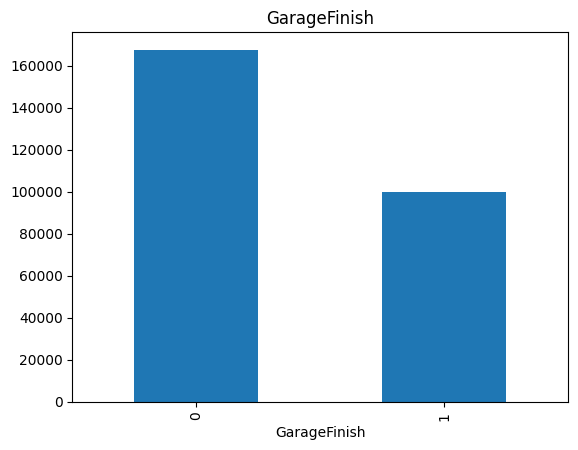

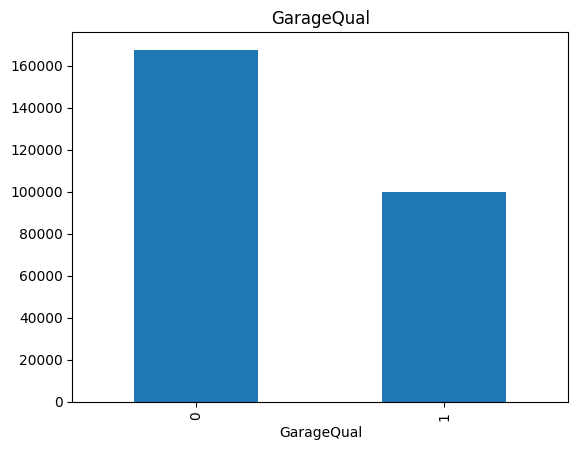

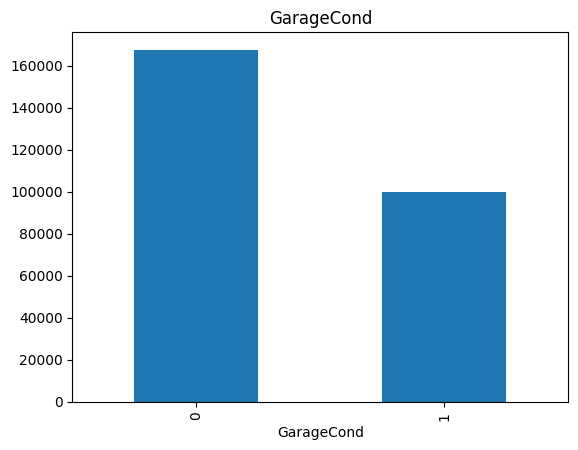

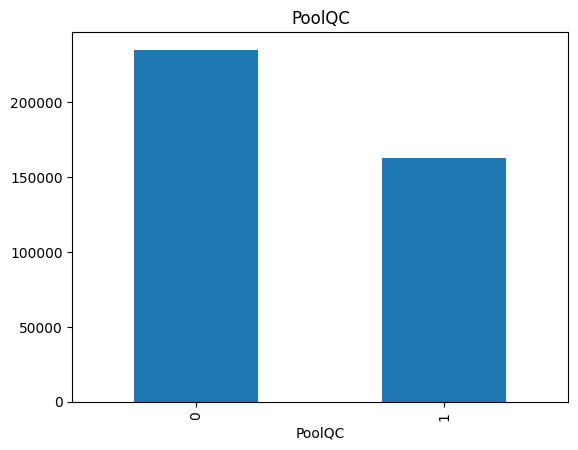

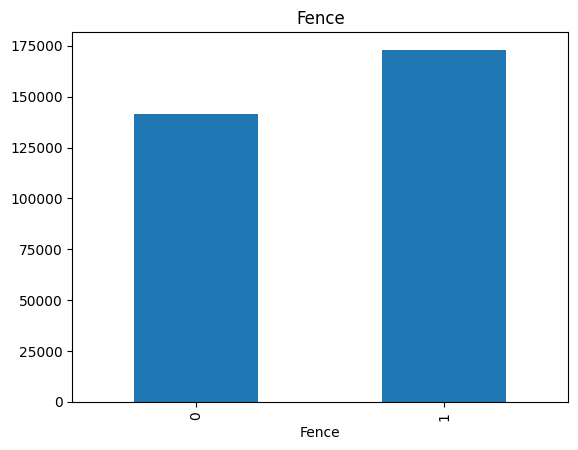

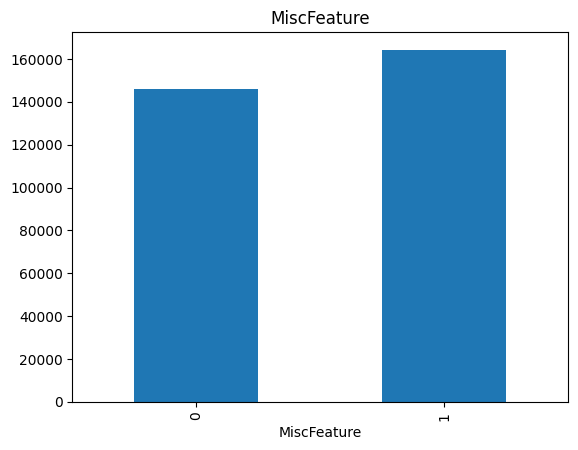

In [62]:
for feature in features_with_na:
    data = data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [63]:
##  Id feature from the dataset which is not required
print("Id of Houses {}".format(len(data.Id)))

Id of Houses 1460


### ***Numerical Variable***

In [64]:
## list the numerical variable
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))

data[numerical_features].head()

Number of numerical variables:  53


,Id,MSSubClass,LotFrontage,LotArea,Alley,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SalePrice
0,1,60,0,8450,1,7,5,2003,2003,0,0,0,0,0,0,706,0,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,1,0,0,0,2,548,0,0,0,61,0,0,0,0,1,1,1,0,2,2008,208500
1,2,20,0,9600,1,6,8,1976,1976,1,0,0,0,0,0,978,0,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,0,0,0,0,2,460,0,0,298,0,0,0,0,0,1,1,1,0,5,2007,181500
2,3,60,0,11250,1,7,5,2001,2002,0,0,0,0,0,0,486,0,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,0,0,0,0,2,608,0,0,0,42,0,0,0,0,1,1,1,0,9,2008,223500
3,4,70,0,9550,1,7,5,1915,1970,1,0,0,0,0,0,216,0,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,0,0,0,0,3,642,0,0,0,35,272,0,0,0,1,1,1,0,2,2006,140000
4,5,60,0,14260,1,8,5,2000,2000,0,0,0,0,0,0,655,0,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,0,0,0,0,3,836,0,0,192,84,0,0,0,0,1,1,1,0,12,2008,250000


### ***Temporal Variables (DateTime Variables)***

*From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold.*

In [65]:
## list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [66]:
## content of these year variables
for feature in year_feature:
    print(feature, data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [0 1]
YrSold [2008 2007 2006 2009 2010]


Text(0.5, 1.0, 'House Price vs YearSold')

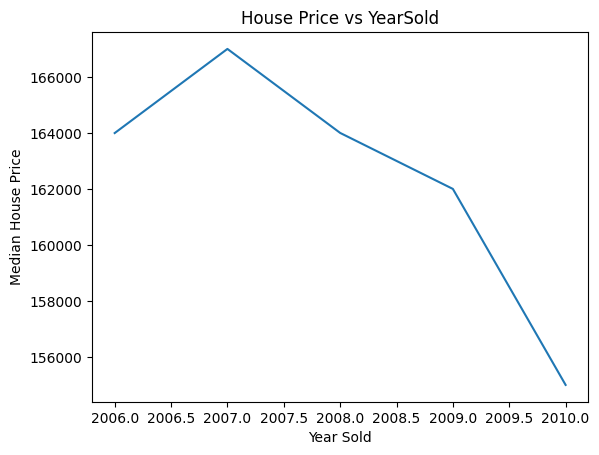

In [67]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")

In [68]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

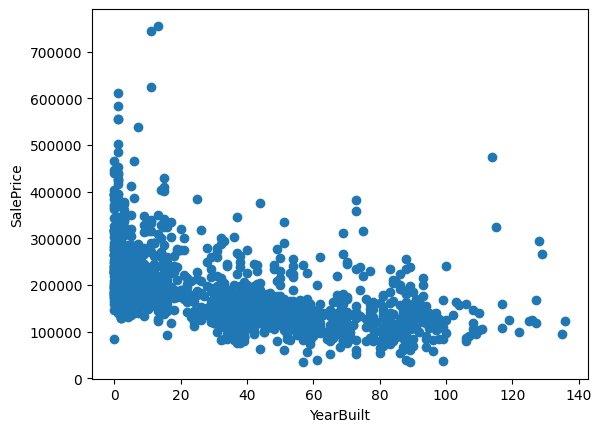

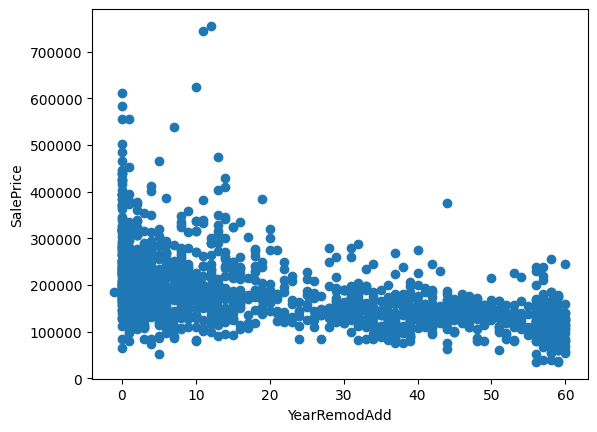

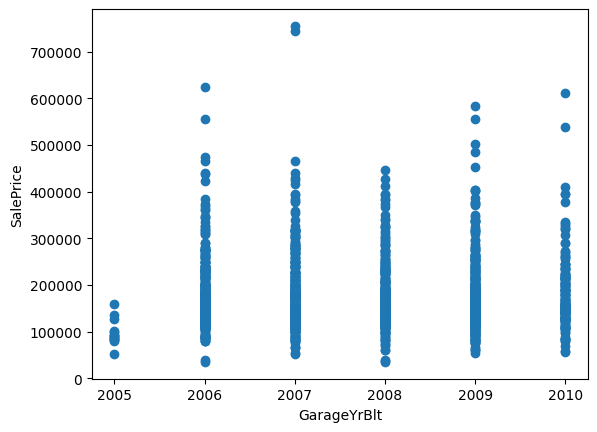

In [69]:
## Here we will compare the difference between all years feature with SalesPrice

for feature in year_feature:
    if feature!='YrSold':
        data=data.copy()

        # capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        # visualize
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [70]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 34


In [71]:
discrete_feature

['MSSubClass',
 'LotFrontage',
 'Alley',
 'OverallQual',
 'OverallCond',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 '3SsnPorch',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal',
 'MoSold']

In [72]:
data[discrete_feature].head()

,MSSubClass,LotFrontage,Alley,OverallQual,OverallCond,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,3SsnPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold
0,60,0,1,7,5,0,0,0,0,0,0,0,0,1,0,2,1,3,1,8,0,1,0,0,2,0,0,0,0,1,1,1,0,2
1,20,0,1,6,8,1,0,0,0,0,0,0,0,0,1,2,0,3,1,6,1,0,0,0,2,0,0,0,0,1,1,1,0,5
2,60,0,1,7,5,0,0,0,0,0,0,0,0,1,0,2,1,3,1,6,1,0,0,0,2,0,0,0,0,1,1,1,0,9
3,70,0,1,7,5,1,0,0,0,0,0,0,0,1,0,1,0,3,1,7,1,0,0,0,3,0,0,0,0,1,1,1,0,2
4,60,0,1,8,5,0,0,0,0,0,0,0,0,1,0,2,1,4,1,9,1,0,0,0,3,0,0,0,0,1,1,1,0,12


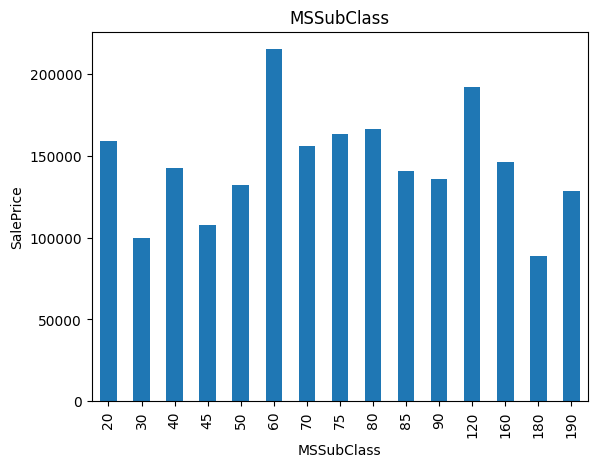

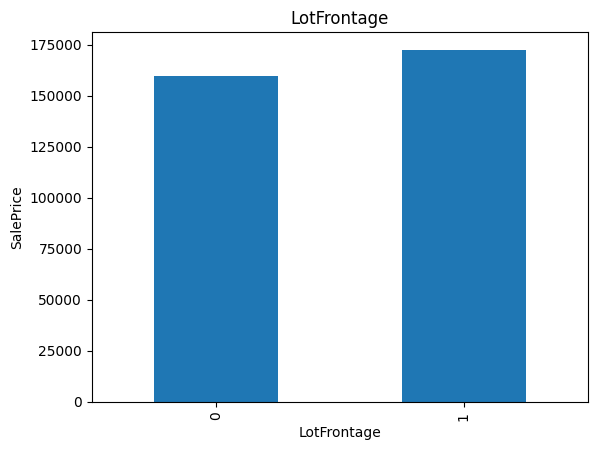

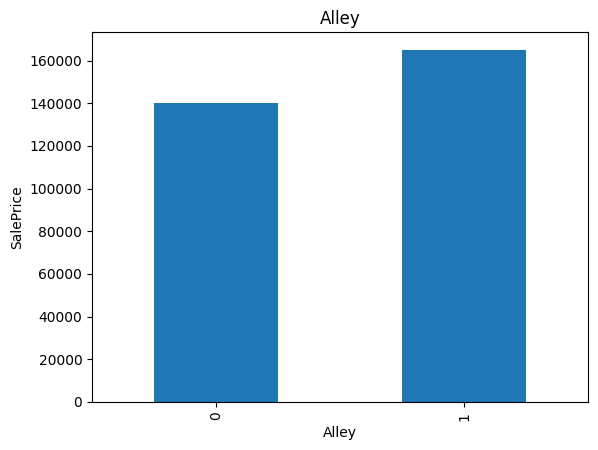

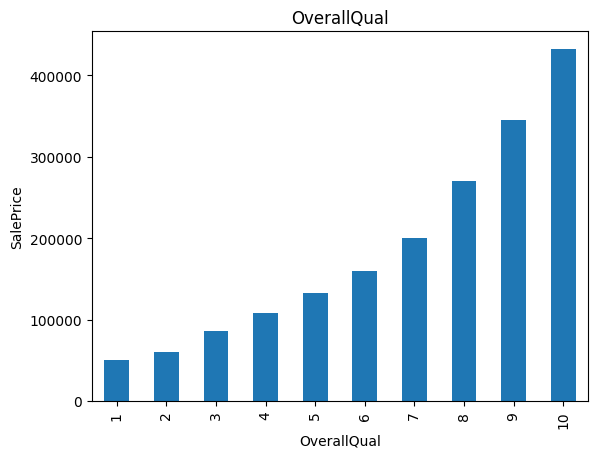

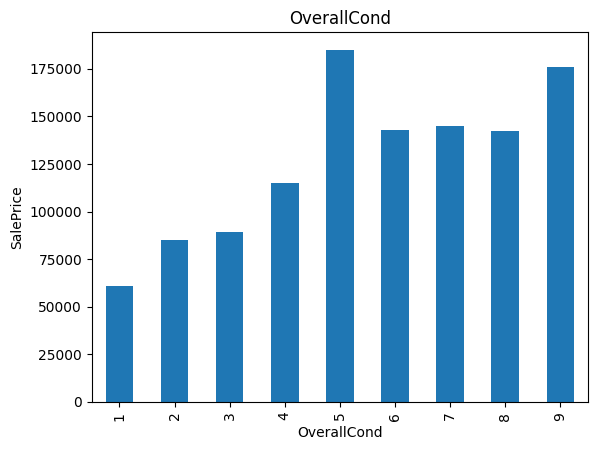

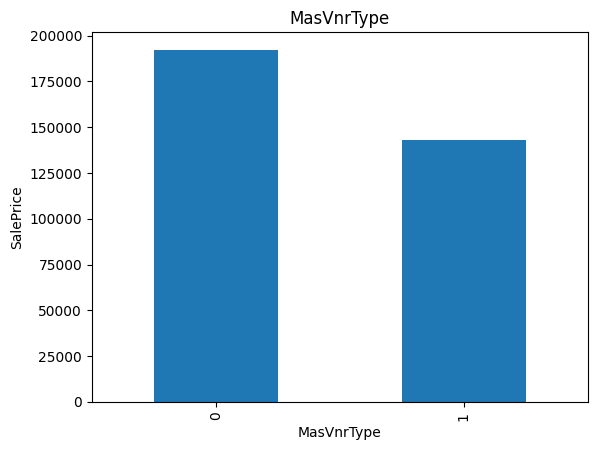

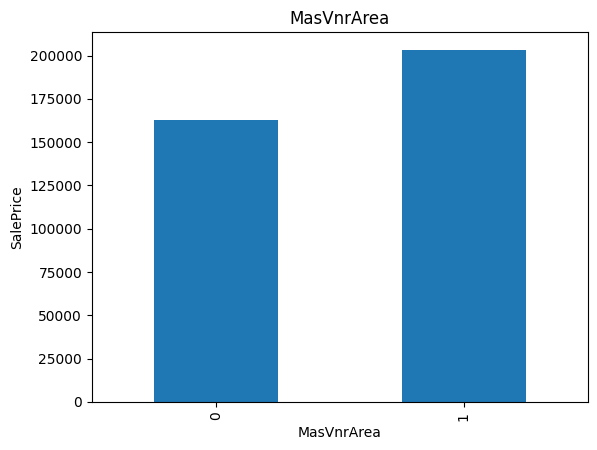

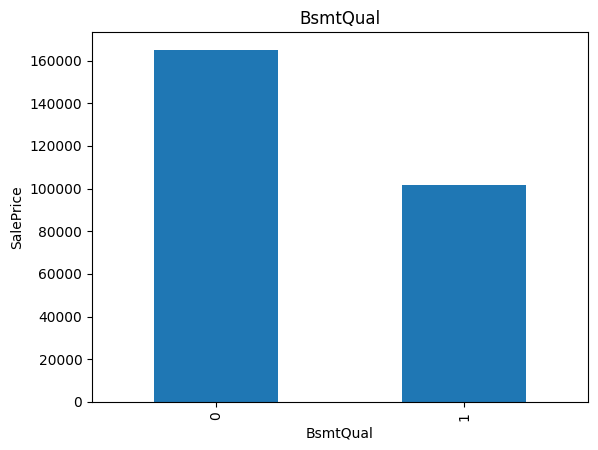

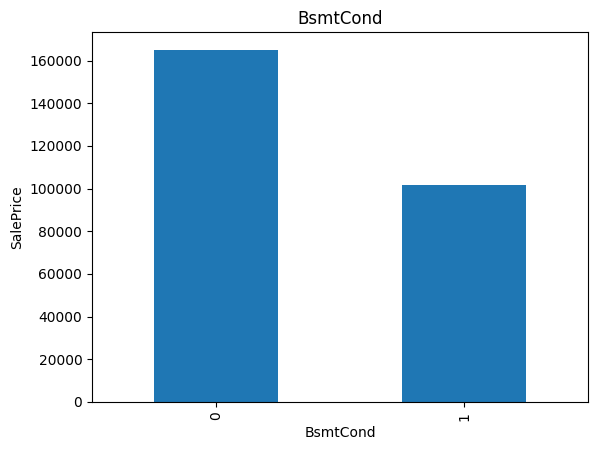

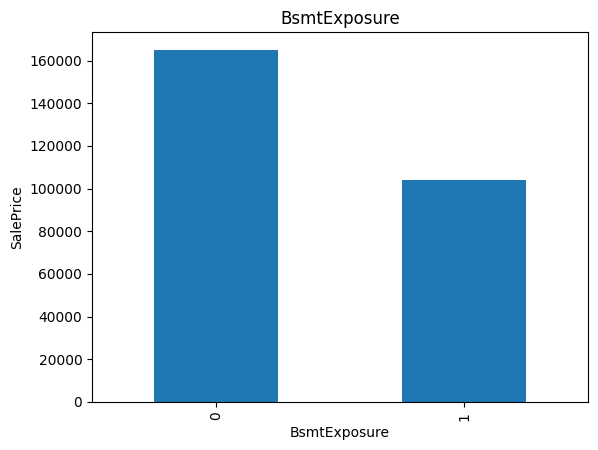

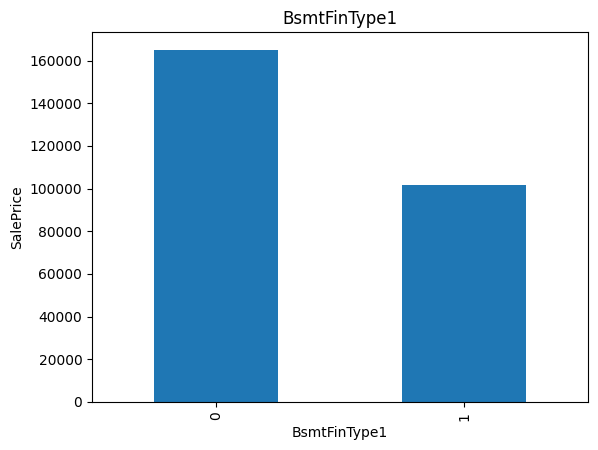

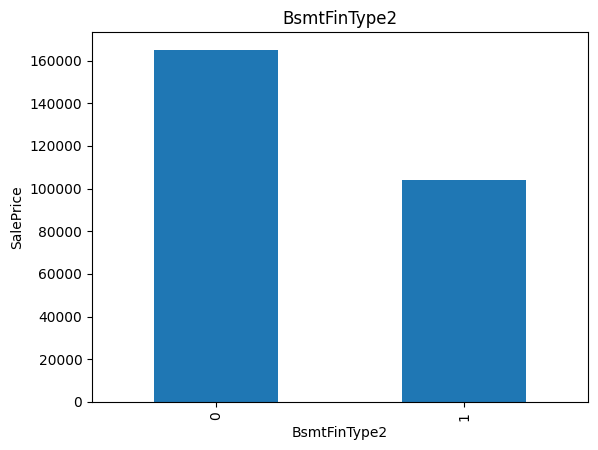

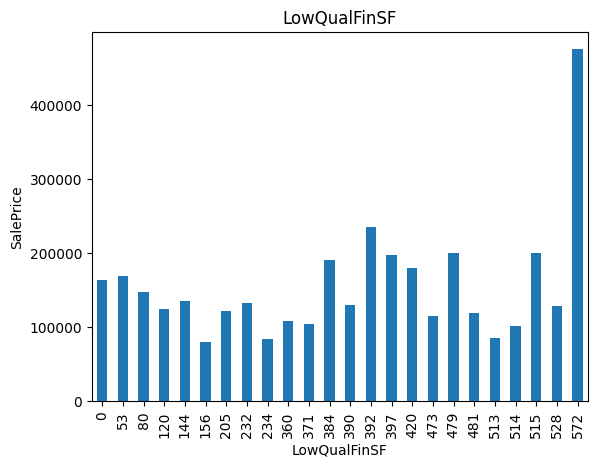

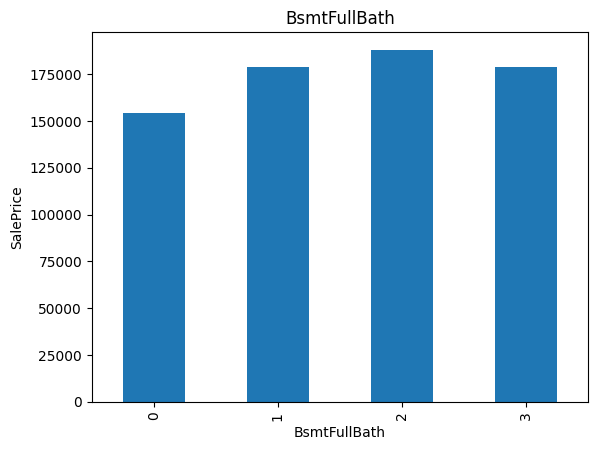

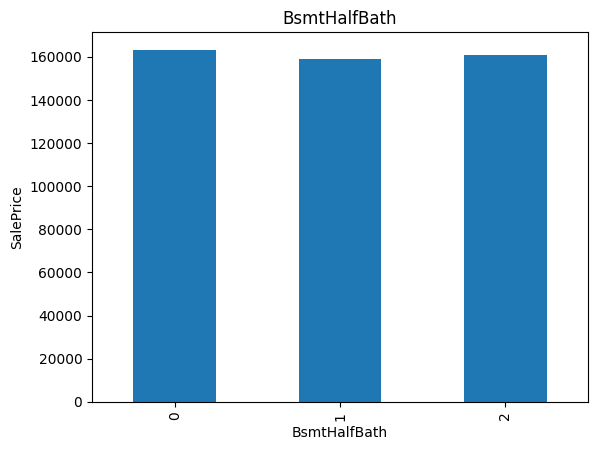

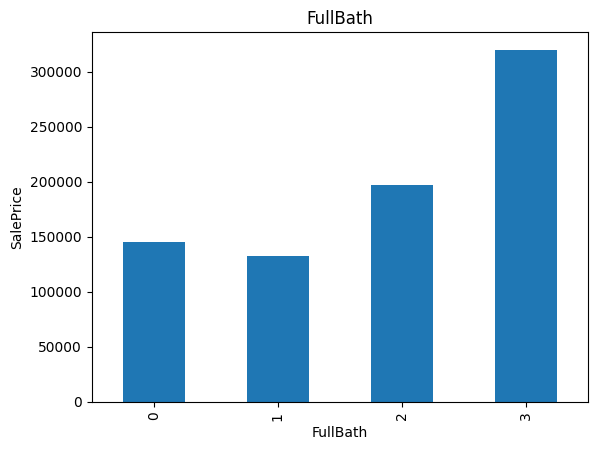

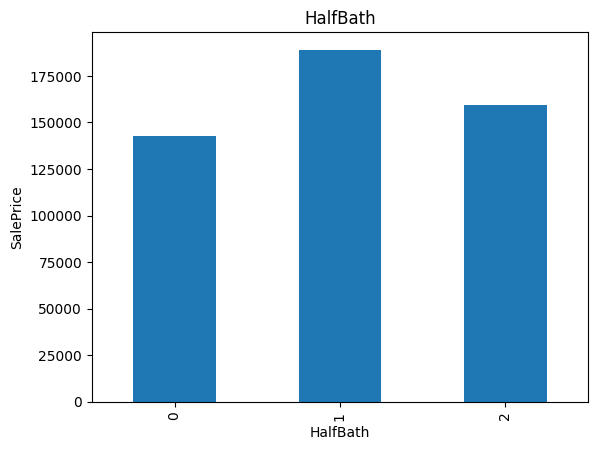

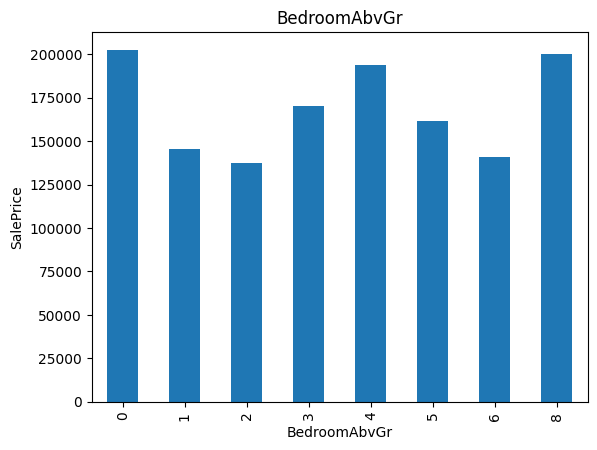

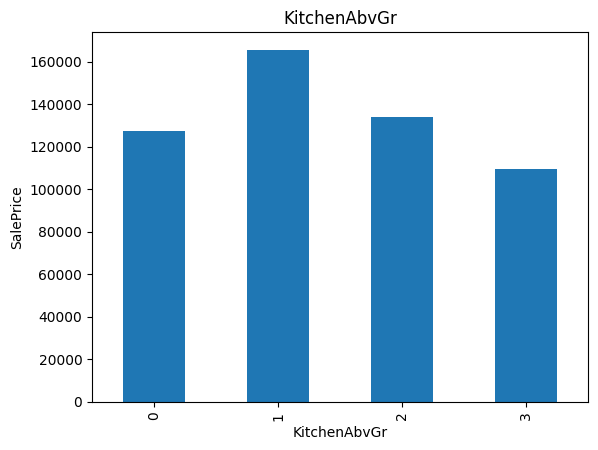

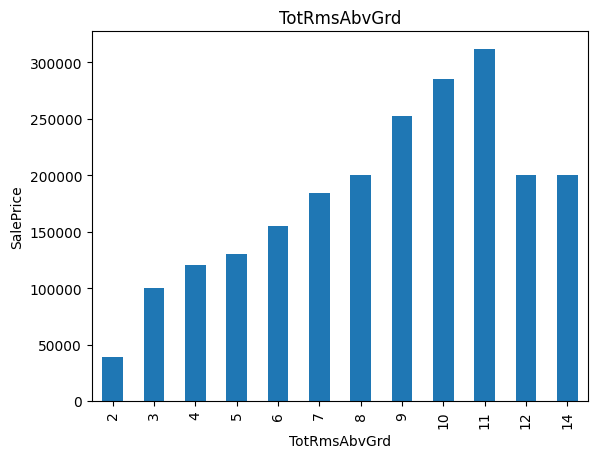

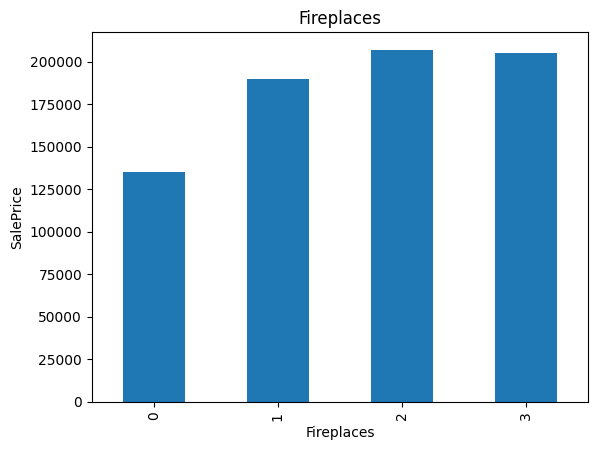

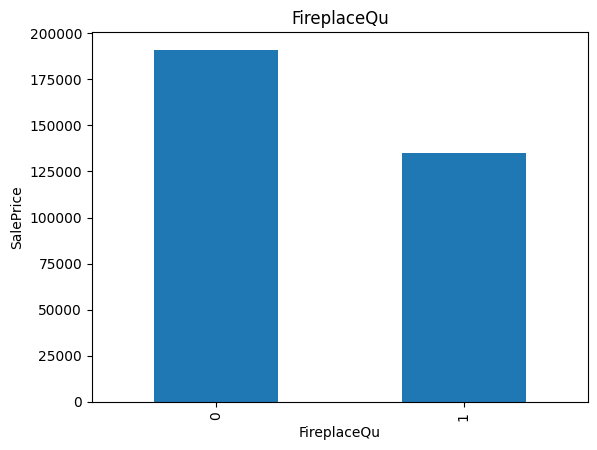

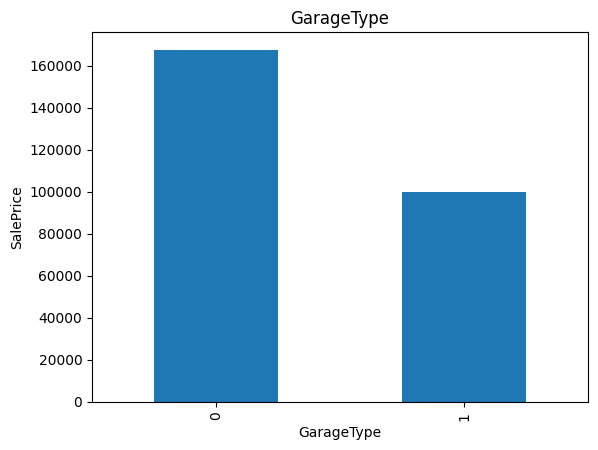

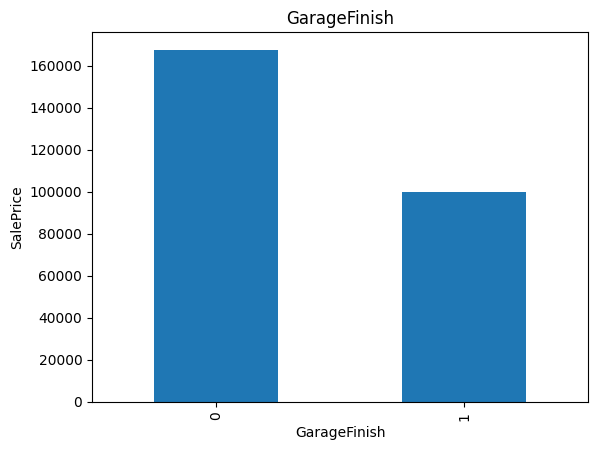

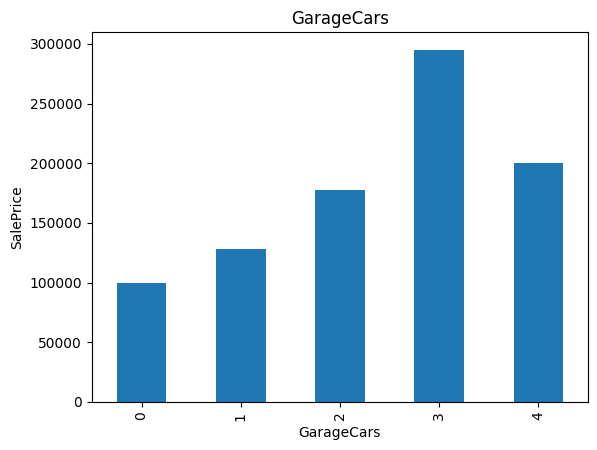

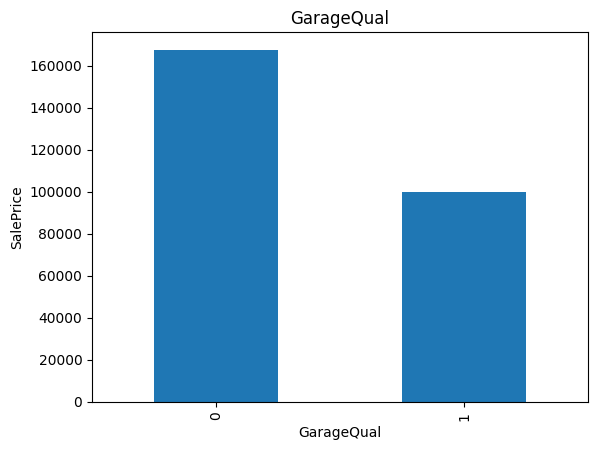

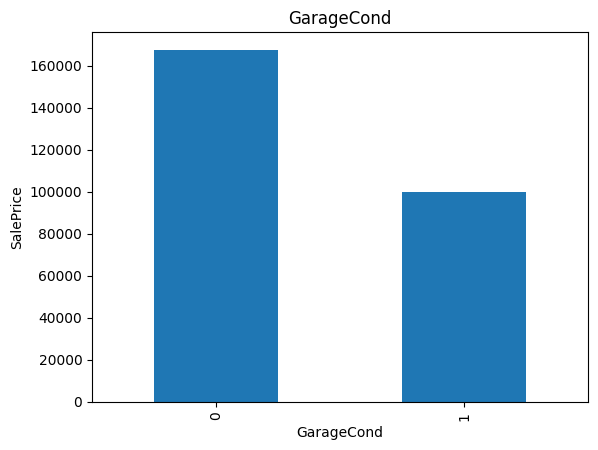

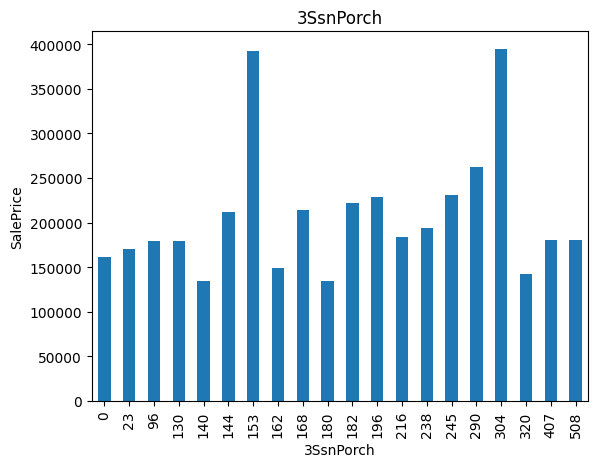

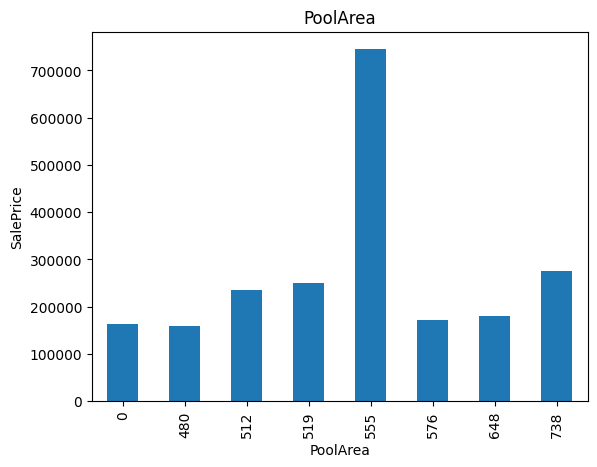

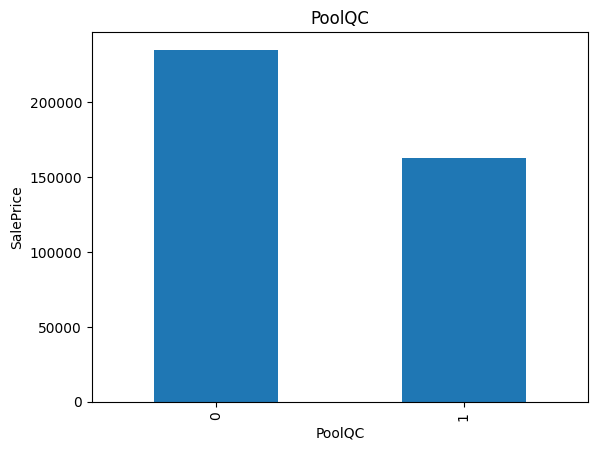

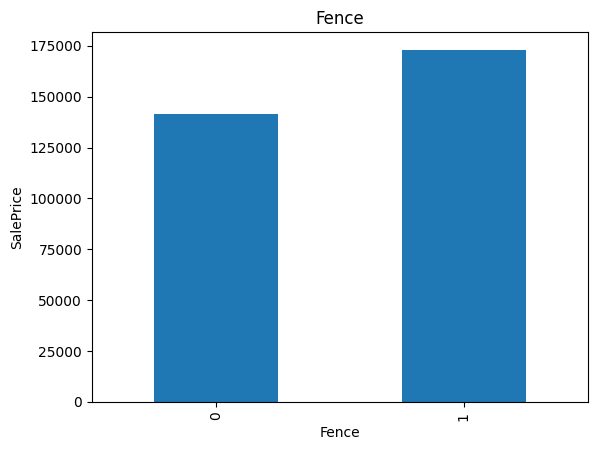

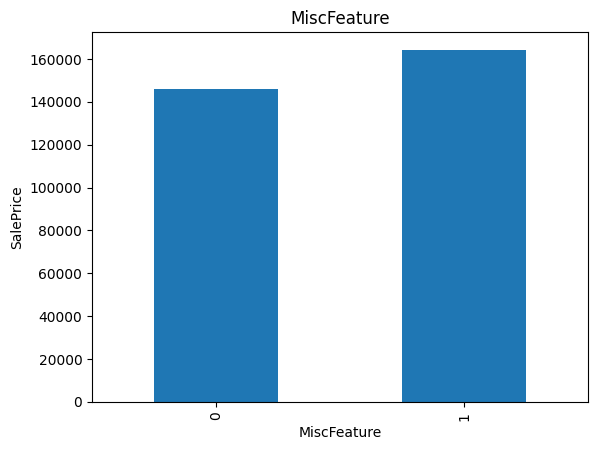

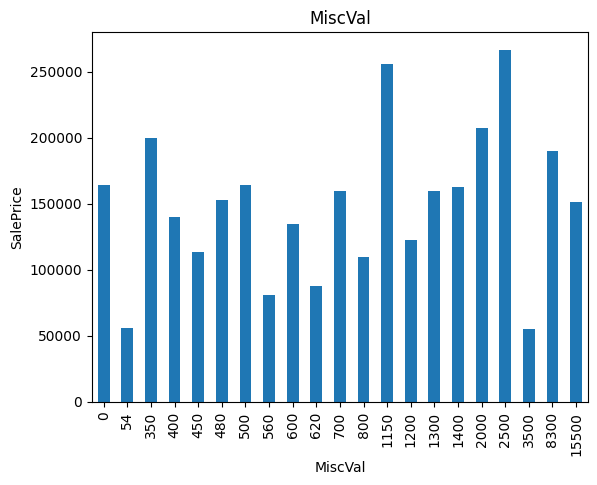

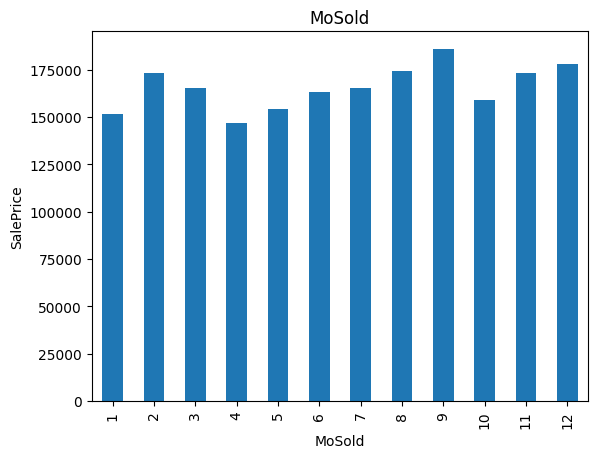

In [73]:
## Finding the relationship between them and Sale Price

for feature in discrete_feature:
    data=data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [74]:
## There is a relationship between variable number and SalePrice


### ***Continuous Variable***

In [75]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 14


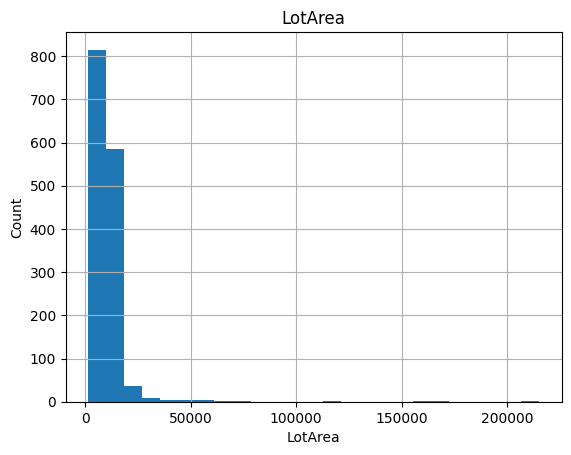

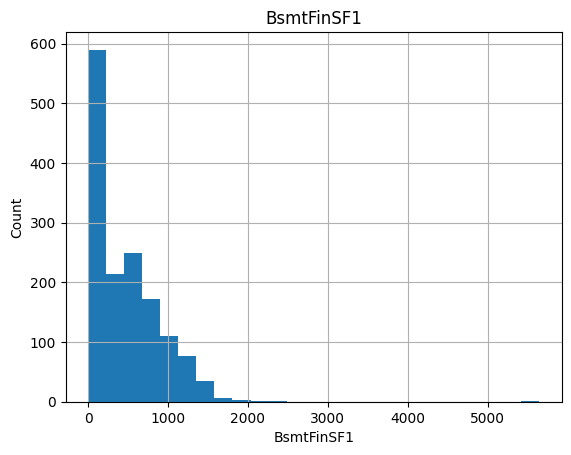

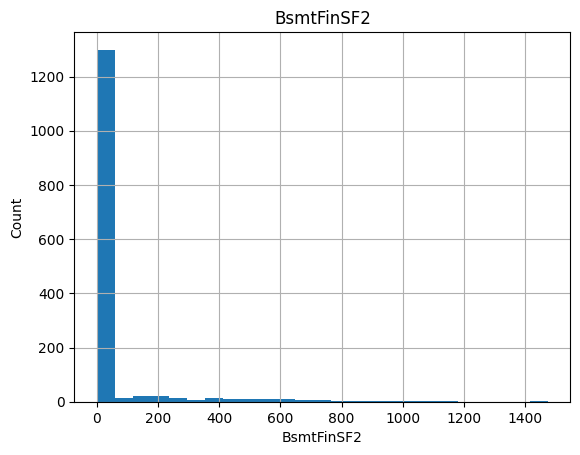

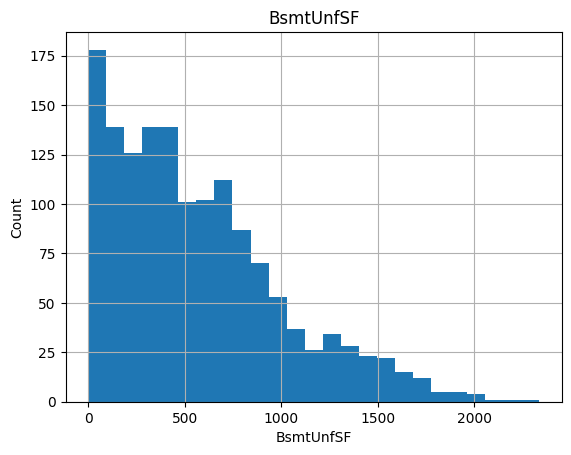

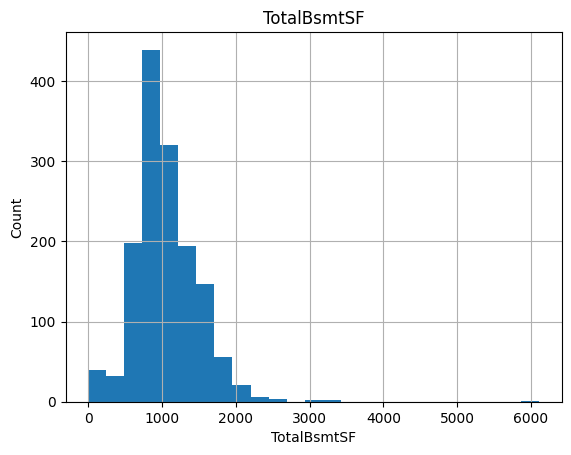

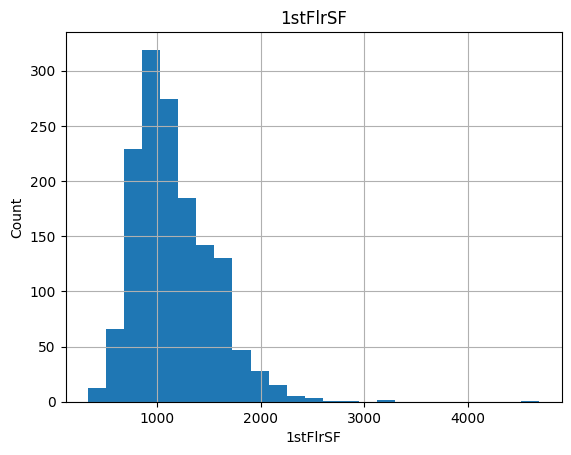

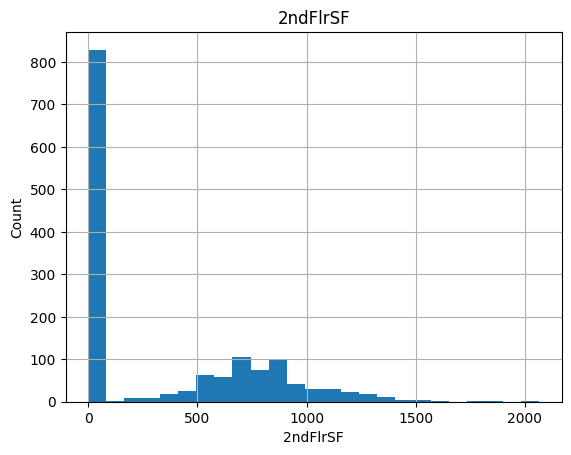

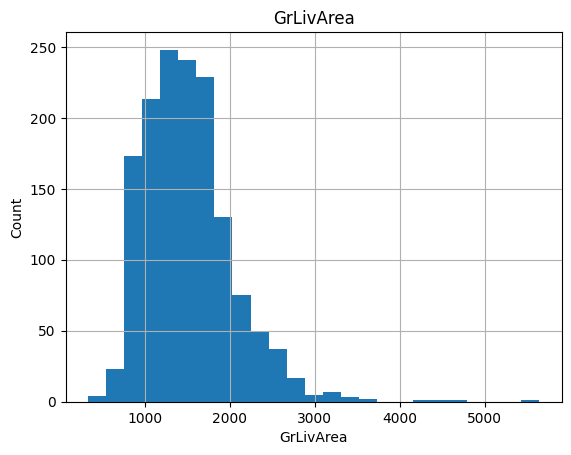

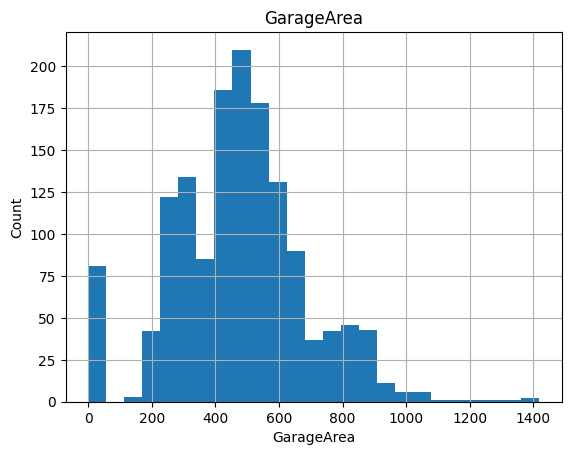

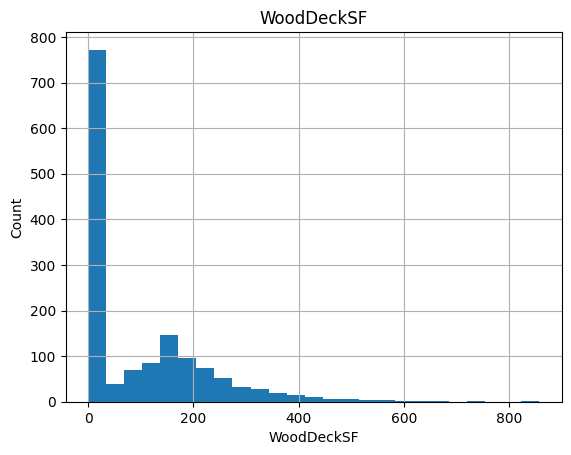

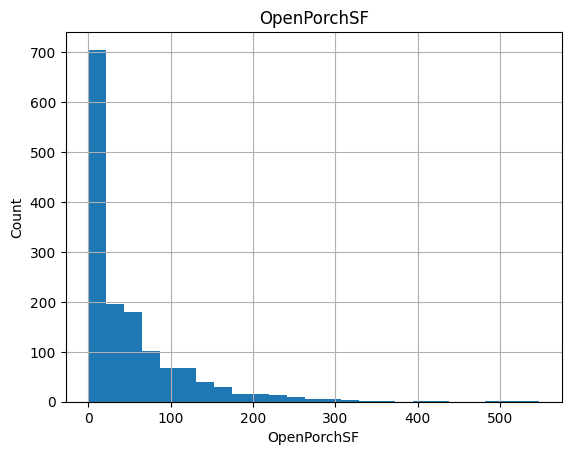

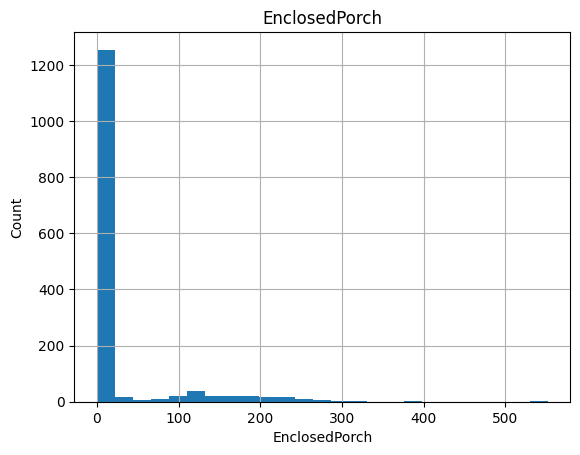

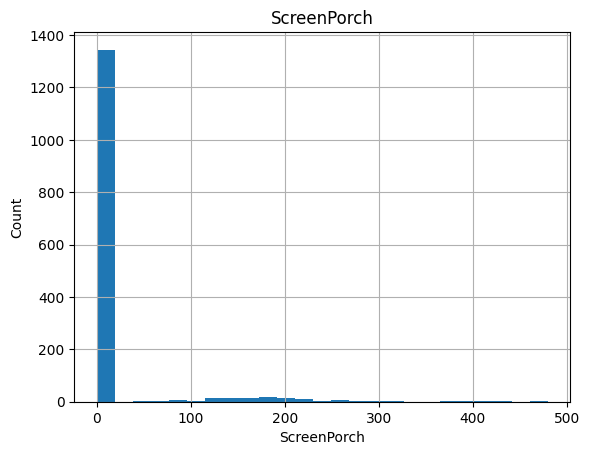

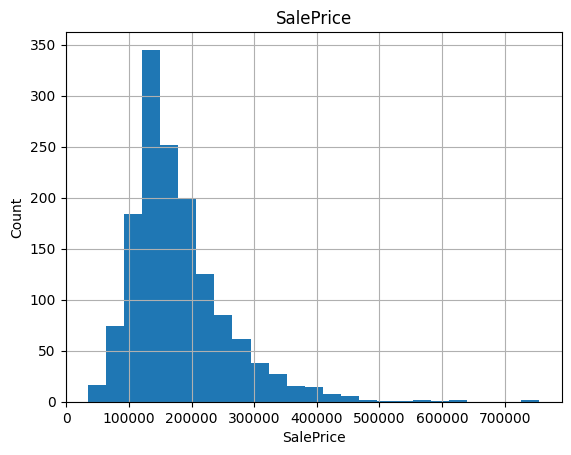

In [76]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## ***EDA Part - 2***

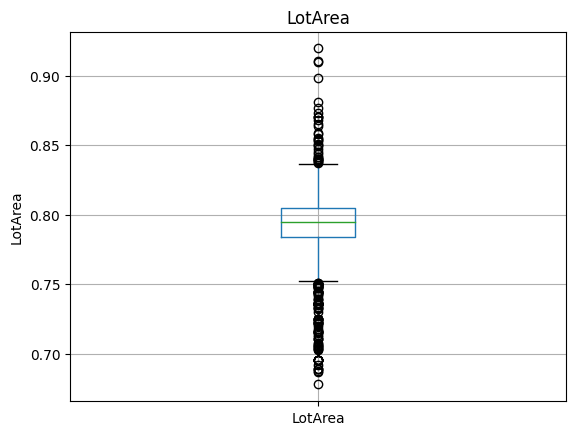

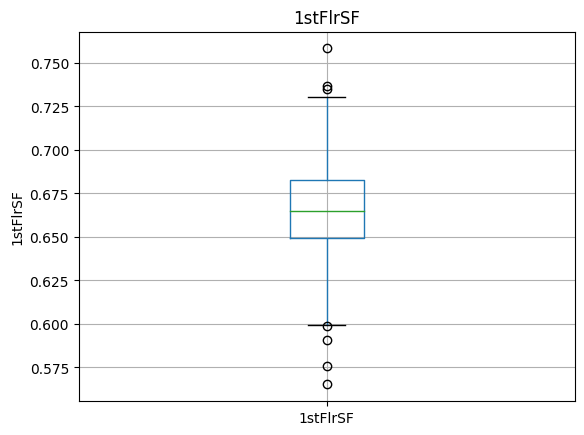

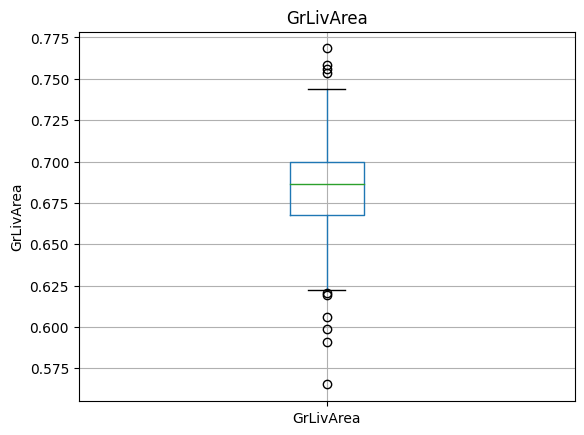

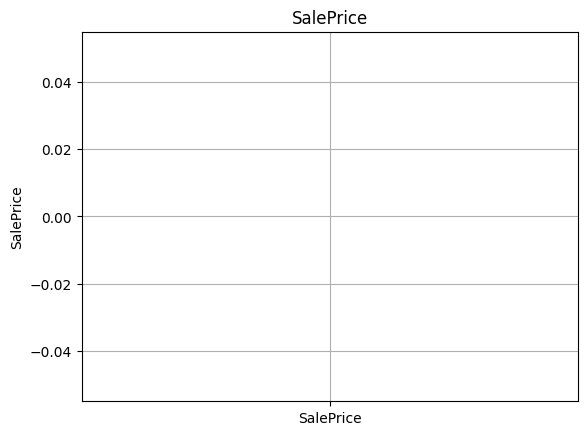

In [82]:
## Here we will be using Logarithmic transformation

for feature in continuous_feature:
    data=data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## ***Outliers***

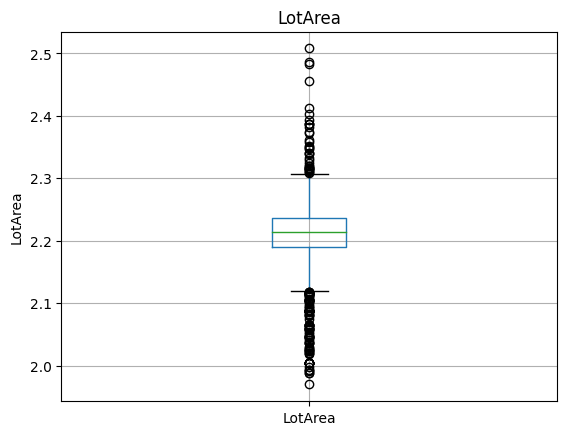

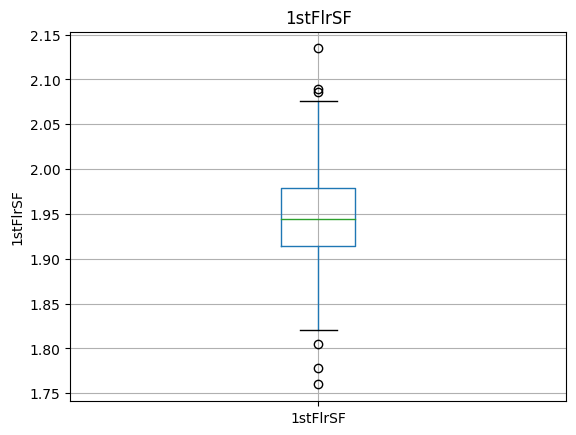

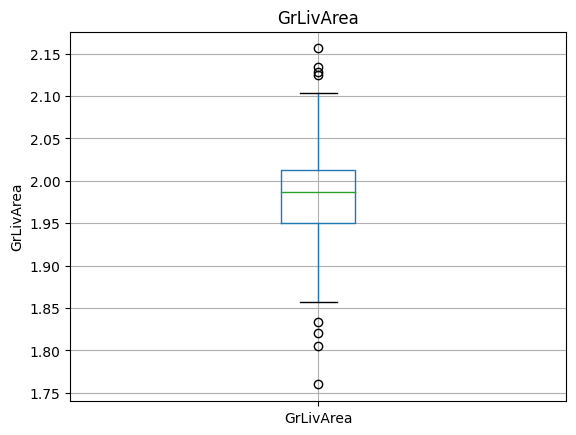

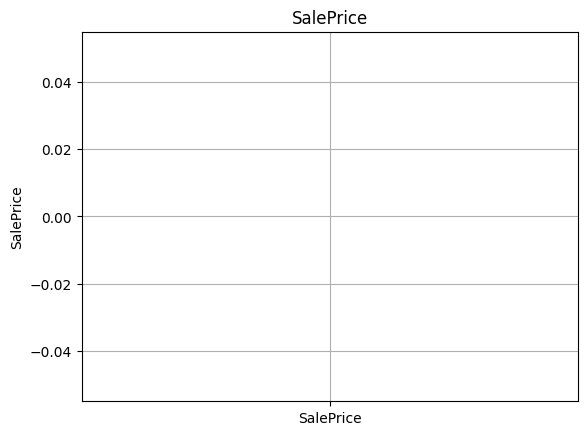

In [78]:
for feature in continuous_feature:
    data=data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [79]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,0,2.201872,Pave,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,0,0,Gd,TA,PConc,0,0,0,0,706,0,0,150,856,GasA,Ex,Y,SBrkr,1.909879,854,0,2.007442,1,0,2,1,3,1,Gd,8,Typ,0,1,0,2008,0,2,548,0,0,Y,0,61,0,0,0,0,1,1,1,0,2,2008,WD,Normal,NaN
1,2,20,RL,0,2.215885,Pave,1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,1,0,TA,TA,CBlock,0,0,0,0,978,0,0,284,1262,GasA,Ex,Y,SBrkr,1.965776,0,0,1.965776,0,1,2,0,3,1,TA,6,Typ,1,0,0,2007,0,2,460,0,0,Y,298,0,0,0,0,0,1,1,1,0,5,2007,WD,Normal,NaN
2,3,60,RL,0,2.233034,Pave,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,0,0,Gd,TA,PConc,0,0,0,0,486,0,0,434,920,GasA,Ex,Y,SBrkr,1.920501,866,0,2.013266,1,0,2,1,3,1,Gd,6,Typ,1,0,0,2008,0,2,608,0,0,Y,0,42,0,0,0,0,1,1,1,0,9,2008,WD,Normal,NaN
3,4,70,RL,0,2.215315,Pave,1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,1,0,TA,TA,BrkTil,0,0,0,0,216,0,0,540,756,GasA,Gd,Y,SBrkr,1.926869,756,0,2.007990,1,0,1,0,3,1,Gd,7,Typ,1,0,0,2006,0,3,642,0,0,Y,0,35,272,0,0,0,1,1,1,0,2,2006,WD,Abnorml,NaN
4,5,60,RL,0,2.258133,Pave,1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,0,0,Gd,TA,PConc,0,0,0,0,655,0,0,490,1145,GasA,Ex,Y,SBrkr,1.952057,1053,0,2.040610,1,0,2,1,4,1,Gd,9,Typ,1,0,0,2008,0,3,836,0,0,Y,192,84,0,0,0,0,1,1,1,0,12,2008,WD,Normal,NaN


### ***Categorical Variables***

In [83]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [84]:
data[categorical_features].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal


In [87]:
data[categorical_features].tail()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,GasA,Ex,Y,SBrkr,TA,Typ,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,GasA,TA,Y,SBrkr,TA,Min1,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,GasA,Ex,Y,SBrkr,Gd,Typ,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,GasA,Gd,Y,FuseA,Gd,Typ,Y,WD,Normal
1459,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,Gd,TA,CBlock,GasA,Gd,Y,SBrkr,TA,Typ,Y,WD,Normal


In [86]:
for feature in categorical_features:
    print('The feature is {} and number of categorical are {}'.format(feature,len(data[feature].unique())))

The feature is MSZoning and number of categorical are 5
The feature is Street and number of categorical are 2
The feature is LotShape and number of categorical are 4
The feature is LandContour and number of categorical are 4
The feature is Utilities and number of categorical are 2
The feature is LotConfig and number of categorical are 5
The feature is LandSlope and number of categorical are 3
The feature is Neighborhood and number of categorical are 25
The feature is Condition1 and number of categorical are 9
The feature is Condition2 and number of categorical are 8
The feature is BldgType and number of categorical are 5
The feature is HouseStyle and number of categorical are 8
The feature is RoofStyle and number of categorical are 6
The feature is RoofMatl and number of categorical are 8
The feature is Exterior1st and number of categorical are 15
The feature is Exterior2nd and number of categorical are 16
The feature is ExterQual and number of categorical are 4
The feature is ExterCon

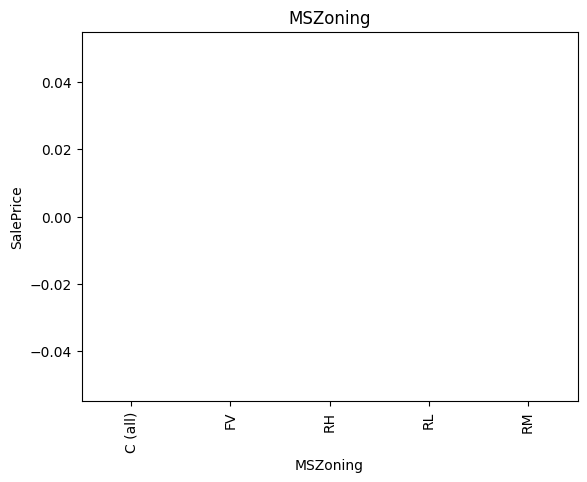

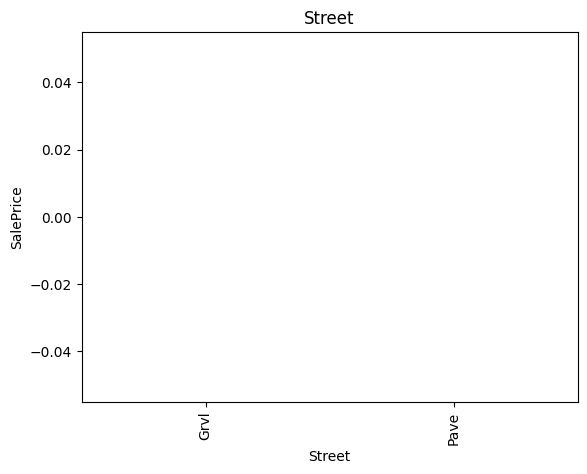

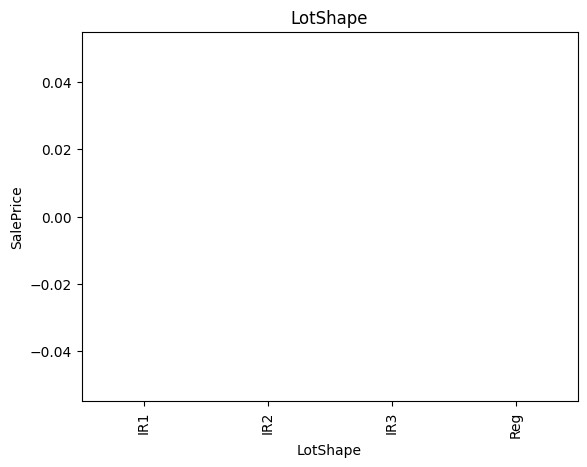

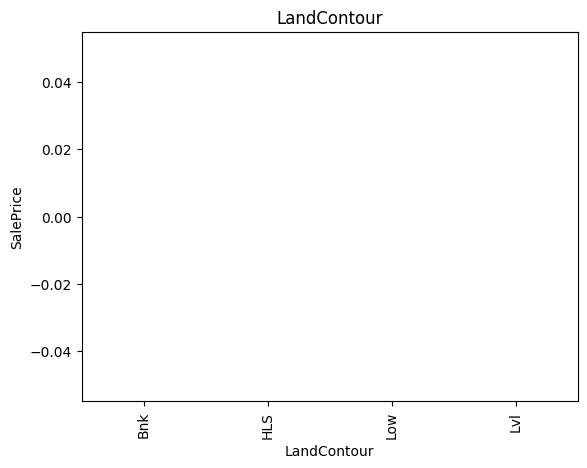

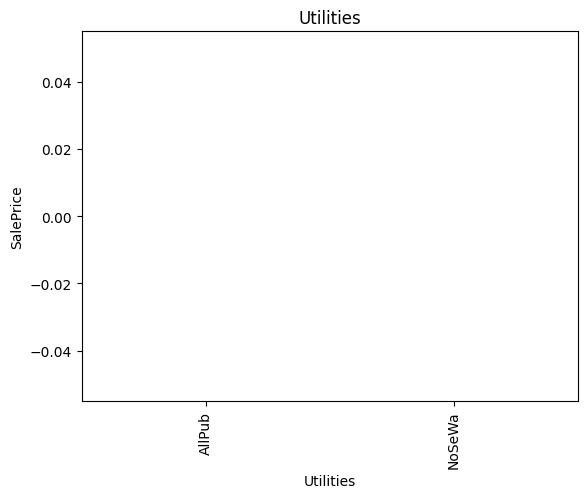

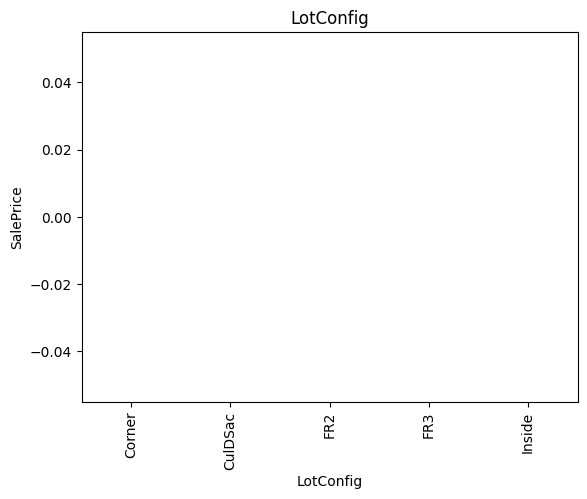

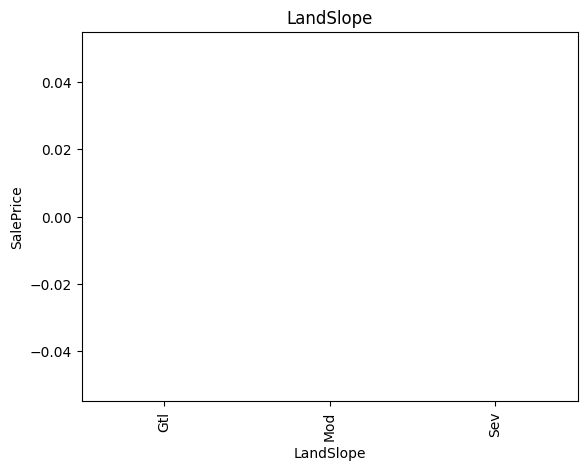

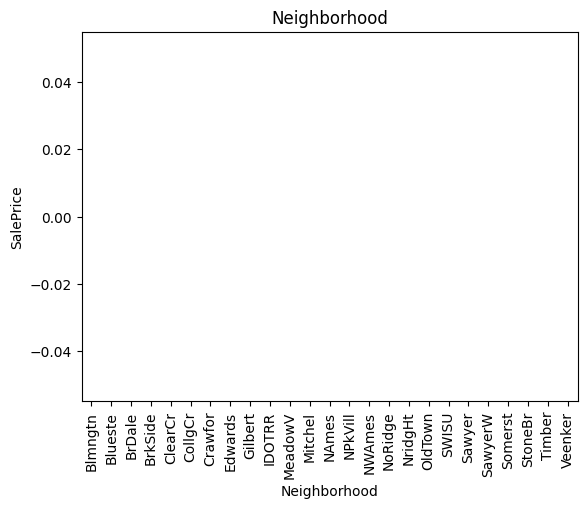

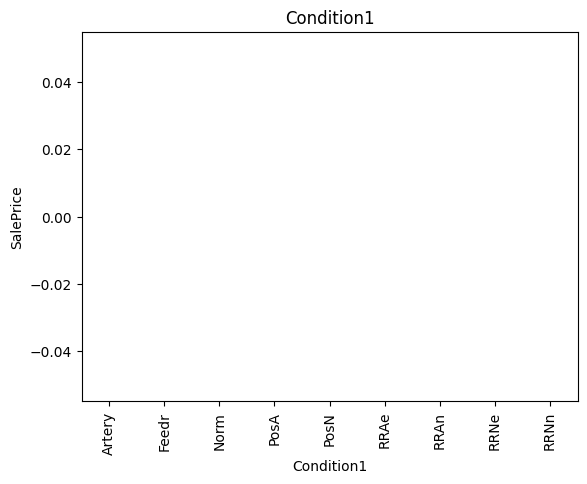

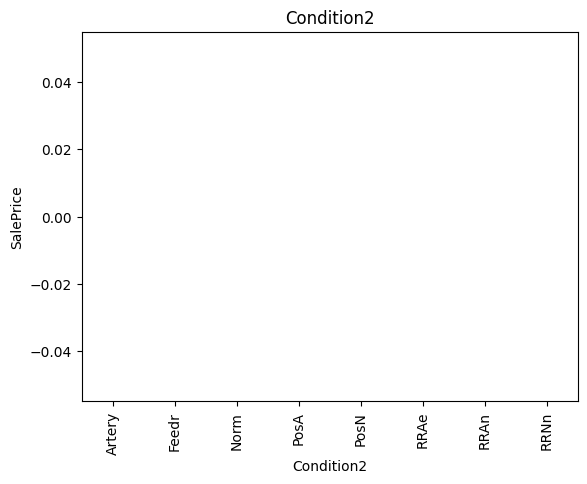

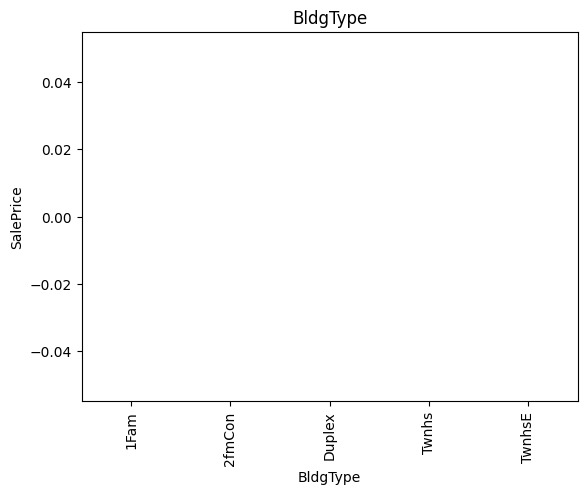

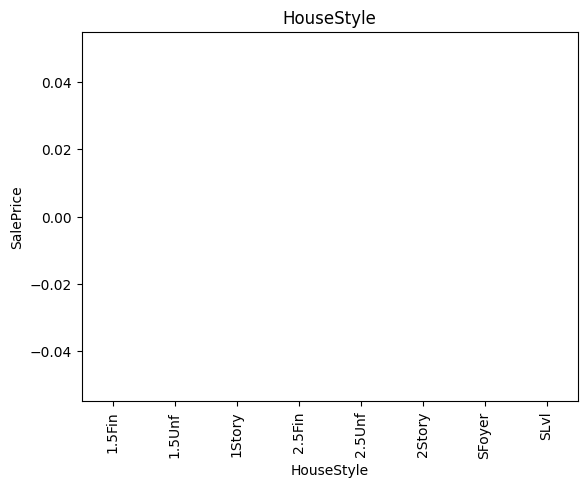

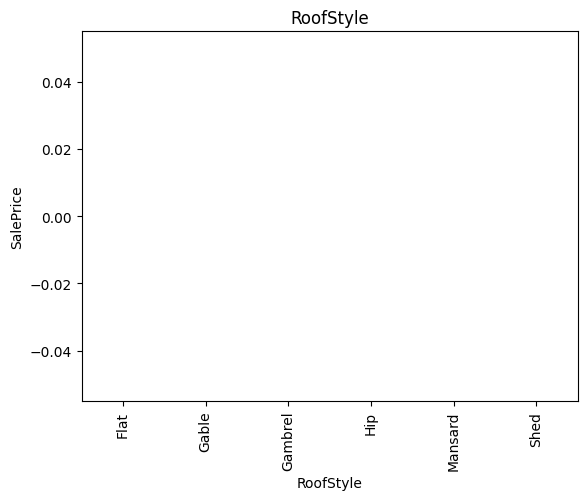

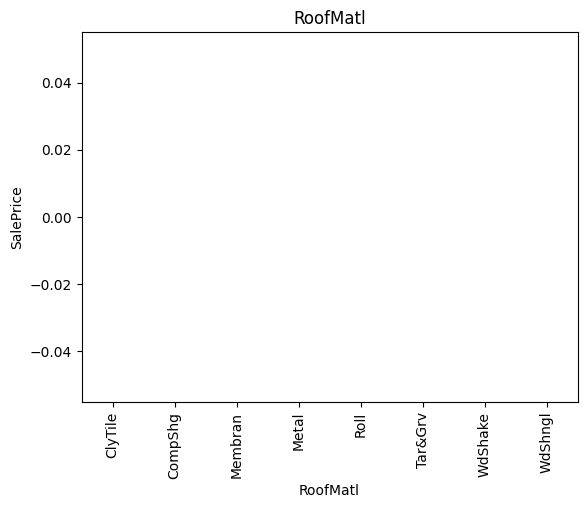

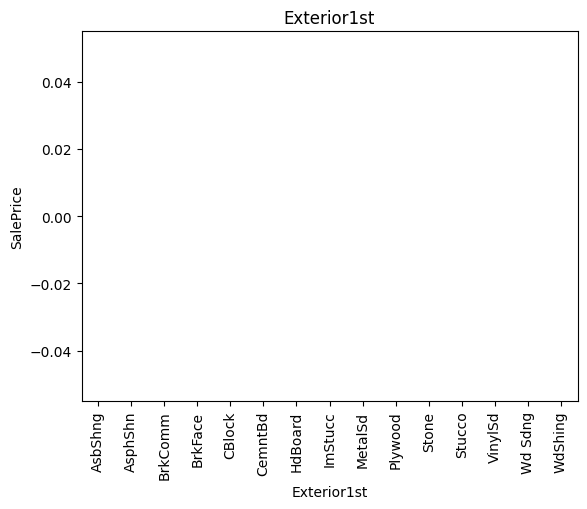

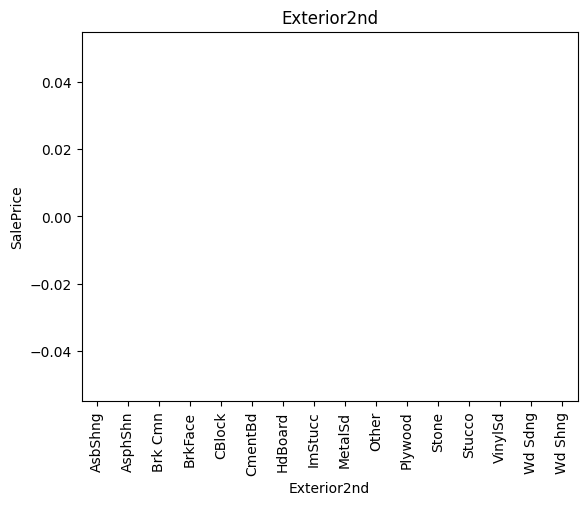

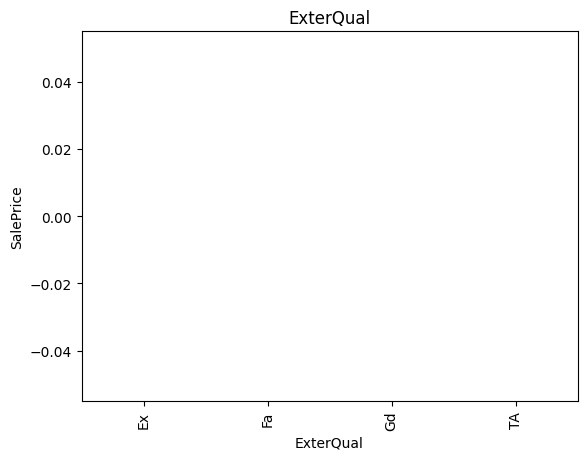

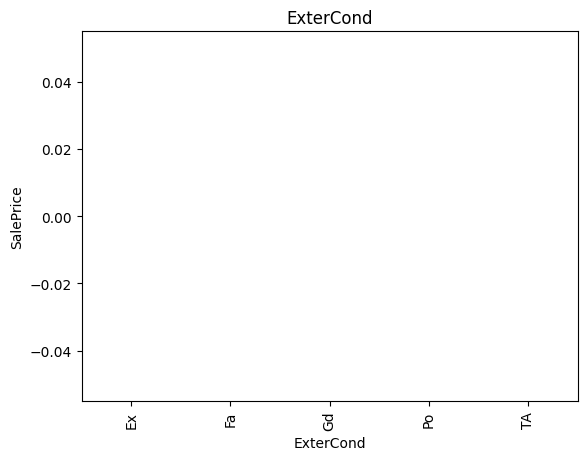

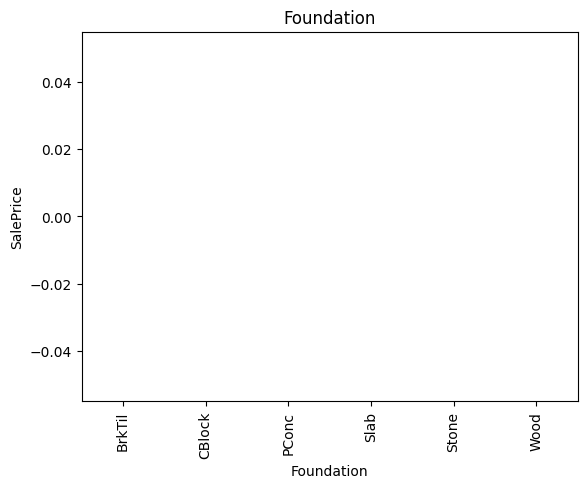

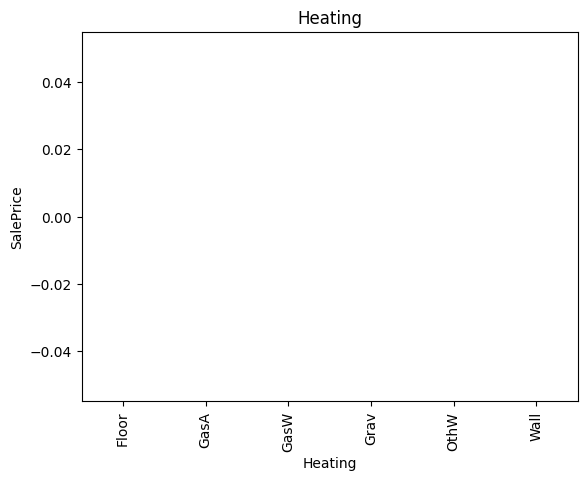

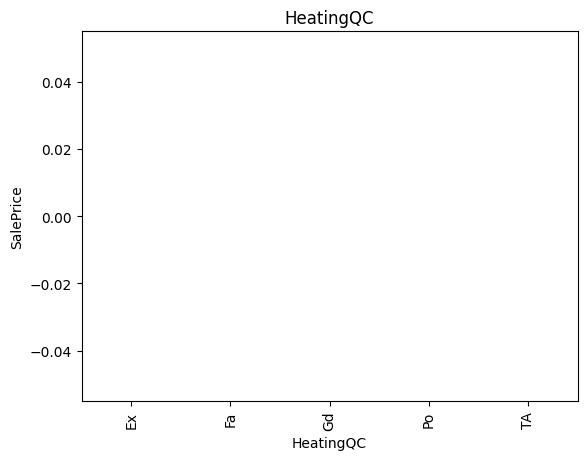

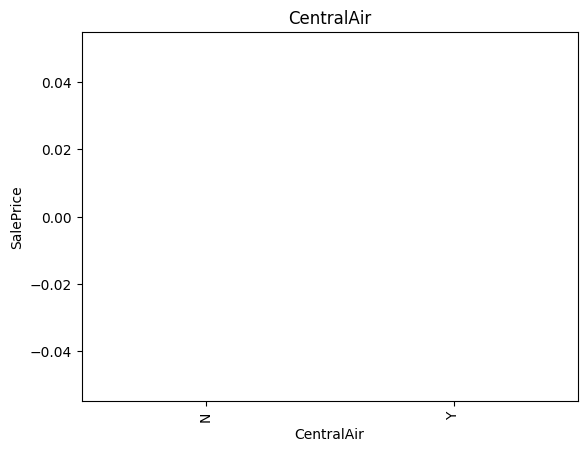

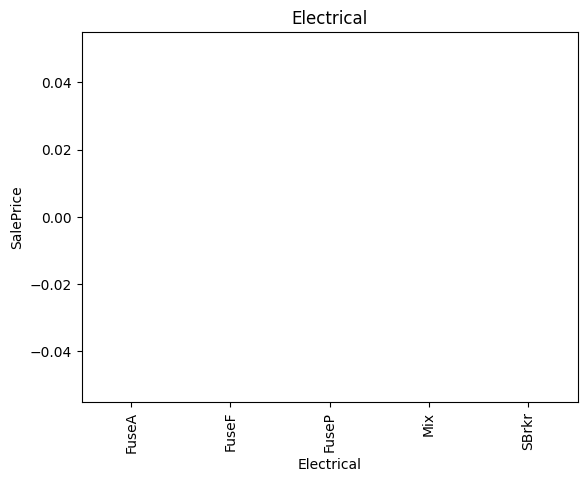

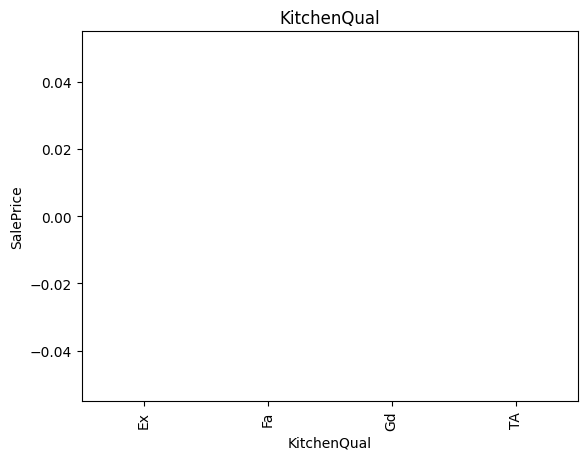

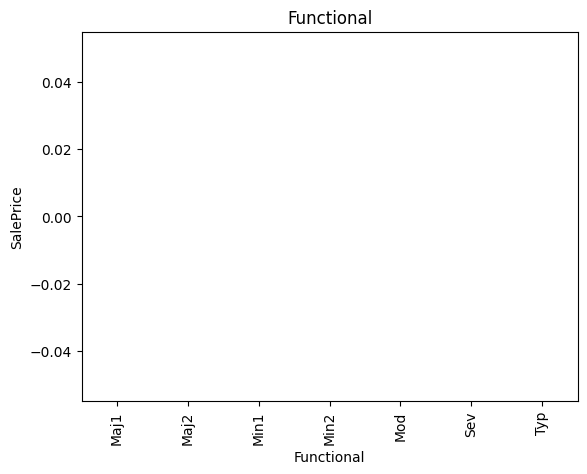

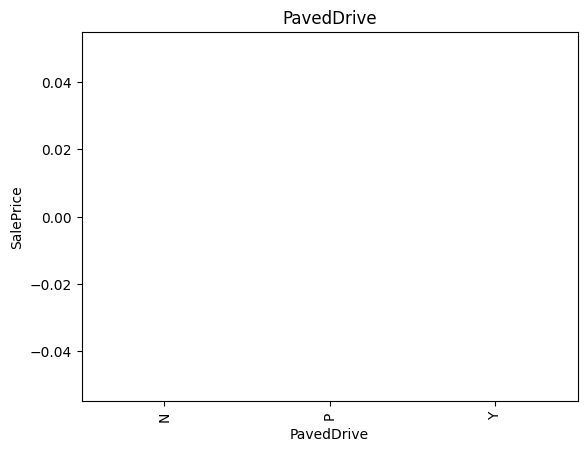

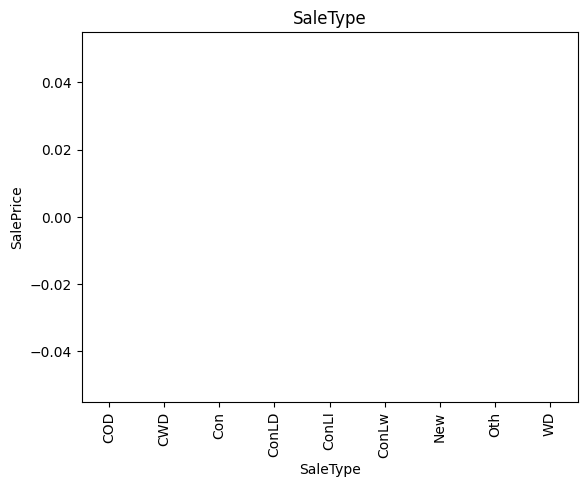

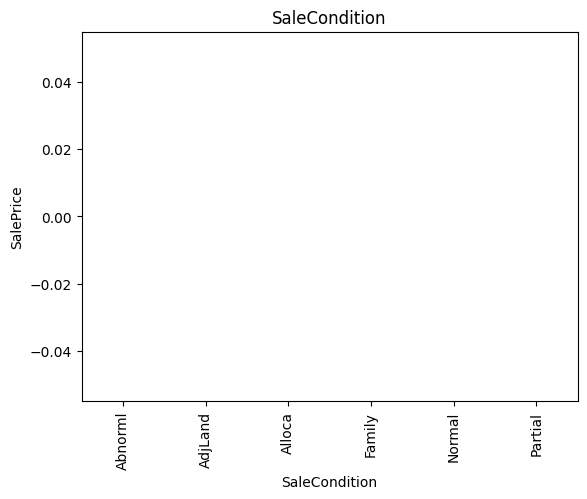

In [91]:
## relationship between categorical variable and dependent feature SalesPrice

for feature in categorical_features:
    data=data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()